<hr>
<center>

# Text Mining - Homework 2

</center>
<center>

Authors: 

Timothy, Denis, Pablo

</center>
<hr>


## Preparation

<hr>

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

from langdetect import detect
import ast

In [2]:
# Load data 
def load_data(file_name):
    return pd.read_csv(file_name, index_col=0)

# Column types 
def update_variable_types(df):
    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

    # Check and confirm data types in numerical columns
    for col in numerical_cols:
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column {col} is not numeric, but it was classified as numerical.")

    return categorical_cols, numerical_cols

# Missing values 
def missing_data_stats(df):
    # Overall statistics
    total_cells = df.size
    total_missing = df.isnull().sum().sum()
    overall_missing_percent = (total_missing / total_cells) * 100

    print(f"Total cells: {total_cells}")
    print(f"Total missing values: {total_missing}")
    print(f"Overall missing percentage: {overall_missing_percent:.2f}%\n")
    
    # Missing statistics per column
    missing_by_column = df.isnull().sum()
    percent_by_column = (missing_by_column / len(df)) * 100
    
    # Combine into a DataFrame
    missing_data = pd.concat([missing_by_column, percent_by_column], axis=1)
    missing_data.columns = ['Total Missing', 'Percent Missing']
    
    # Filter out columns with no missing values and sort descending
    missing_data = missing_data[missing_data['Total Missing'] > 0]
    missing_data = missing_data.sort_values(by='Total Missing', ascending=False)
    
    print("Missing values by column:")
    return missing_data

    

In [3]:
# Load Data 
df = load_data('books_and_genres.csv')

In [4]:
# Print the head of the data 
df.head()

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics..."
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic..."
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '..."
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati..."
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c..."


In [5]:
# Info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10635 entries, 0 to 10634
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10635 non-null  object
 1   text    10373 non-null  object
 2   genres  10635 non-null  object
dtypes: object(3)
memory usage: 332.3+ KB
None


In [6]:
# Columns 
print(df.columns)

Index(['title', 'text', 'genres'], dtype='object')


In [7]:
# Summary stats
print(df.describe())

                  title                                               text  \
count             10635                                              10373   
unique            10635                                              10368   
top     apocolocyntosis  This eBook was produced by James Linden.\n\nTh...   
freq                  1                                                  6   

              genres  
count          10635  
unique          7771  
top     {'classics'}  
freq             171  


In [8]:
# Check data type of columns 
print('\n')
categorical_cols, numerical_cols = update_variable_types(df)
print("Categorical columns: ", categorical_cols)
print("Numerical columns: ", numerical_cols)



Categorical columns:  ['title', 'text', 'genres']
Numerical columns:  []


In [9]:
# Check for missing values
print("Missing values per column:")
missing_data_stats(df)

Missing values per column:
Total cells: 31905
Total missing values: 262
Overall missing percentage: 0.82%

Missing values by column:


,Total Missing,Percent Missing
text,262,2.463564


In [10]:
# Return where the missing values appear 
df[df.isna().any(axis=1)]

,title,text,genres
37,punchinell,NaN,"{'christian', 'middle-grade', 'picture-books',..."
51,great events,NaN,"{'education', 'history', 'reference', 'amazon'..."
58,punch volume,NaN,"{'romance', 'contemporary', 'erotica', 'comics..."
104,life of johnson volume of,NaN,"{'literature', 'history', 'biography', 'classi..."
134,clarissa volume of,NaN,"{'fiction', 'literary-fiction'}"
...,...,...,...
10311,the spirit of,NaN,"{'romance', 'education', 'history', 'sociology..."
10331,laura secord the heroine of,NaN,"{'fiction', 'childrens', 'history', 'biography'}"
10365,the seaboard parish volume,NaN,"{'christian', 'classics', 'religion', 'fiction..."
10425,tales from the arabic volumes,NaN,{'classics'}


In [11]:
df['text'] = df['text'].astype(str)
df['text_len'] = df.text.apply(len)
df.drop(df[df.text_len < 1000].index, inplace=True)
df.drop('text_len', axis=1, inplace=True)
max_char = 1000000 # spaCy can only allocate enough RAM for this many chars in a doc
df.text = df.text.apply(lambda t:t[:max_char])
df.head()

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics..."
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic..."
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '..."
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati..."
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c..."


In [12]:
# Return where the missing values appear 
df[df.isna().any(axis=1)]
# None -> Perfect

,title,text,genres


In [13]:
len(df)

10315

### Part 1 

In [16]:
before_filter = len(df)
df['lang'] = df.text.apply(detect)
df.drop(df[df.lang != 'en'].index, inplace=True)
print(f'{before_filter - len(df)} books removed from the dataset for non-English language')

1267 books removed from the dataset for non-English language


In [17]:
df.head()

,title,text,genres,lang
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics...",en
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...",en
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...",en
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati...",en
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c...",en


In [18]:
df.to_csv('clean_data.csv')

## Part 2 Data Summaries and Visualizations

In [19]:
df = pd.read_csv('clean_data.csv', index_col=0)
df

,title,text,genres,lang
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics...",en
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...",en
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...",en
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati...",en
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c...",en
...,...,...,...,...
10630,young folks history,"This E-text was created by Doug Levy, _litter...","{'fiction', '20th-century', 'history'}",en
10631,yollop,"Produced by Charles Aldarondo, Charles Franks\...","{'classics', 'american', 'humor'}",en
10632,sketches of young couples,Transcribed from the 1903 edition by David Pri...,"{'romance', 'history', 'classics', 'fiction', ...",en
10633,the yosemite,Produced by Dan Anderson and Andrew Sly.\nThan...,"{'adventure', 'history', 'biography', 'classic...",en


In [20]:
df.head()

,title,text,genres,lang
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics...",en
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...",en
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...",en
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati...",en
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c...",en


In [21]:
df_exploded = df.explode('genres')
df_exploded

,title,text,genres,lang
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics...",en
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...",en
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...",en
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati...",en
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c...",en
...,...,...,...,...
10630,young folks history,"This E-text was created by Doug Levy, _litter...","{'fiction', '20th-century', 'history'}",en
10631,yollop,"Produced by Charles Aldarondo, Charles Franks\...","{'classics', 'american', 'humor'}",en
10632,sketches of young couples,Transcribed from the 1903 edition by David Pri...,"{'romance', 'history', 'classics', 'fiction', ...",en
10633,the yosemite,Produced by Dan Anderson and Andrew Sly.\nThan...,"{'adventure', 'history', 'biography', 'classic...",en


In [22]:
def convert_genres(g):
    # If g is a string, try to evaluate it
    if isinstance(g, str):
        try:
            val = ast.literal_eval(g)
            if isinstance(val, (set, list)):
                return list(val)
            else:
                return [val]
        except Exception:
            return [g]
    # If g is a list
    elif isinstance(g, list):
        # If it's a single-element list and that element is a string that looks like a set...
        if len(g) == 1 and isinstance(g[0], str) and g[0].startswith("{") and g[0].endswith("}"):
            try:
                val = ast.literal_eval(g[0])
                if isinstance(val, (set, list)):
                    return list(val)
                else:
                    return [val]
            except Exception:
                return g
        else:
            # For each element in the list, check if it needs conversion
            new_list = []
            for item in g:
                if isinstance(item, str) and item.startswith("{") and item.endswith("}"):
                    try:
                        val = ast.literal_eval(item)
                        if isinstance(val, (set, list)):
                            new_list.extend(list(val))
                        else:
                            new_list.append(val)
                    except Exception:
                        new_list.append(item)
                else:
                    new_list.append(item)
            return new_list
    # If g is a set, just convert to list
    elif isinstance(g, set):
        return list(g)
    else:
        return [g]

# --- Processing pipeline ---

# 1. Compute text_length and unique_word_count per book
if 'text_length' not in df.columns:
    df['text_length'] = df['text'].apply(lambda x: len(x.split()))
# Compute the unique word count for each book
df['unique_word_count'] = df['text'].apply(lambda x: len(set(x.split())))

# 2. Convert the genres column using the updated conversion function
df['genres'] = df['genres'].apply(convert_genres)

# Debug: Check the conversion result. Each cell should now be a list of strings
print("After conversion, genres column:")
print(df['genres'].head())

# 3. Explode the genres so that each row has one genre
df_exploded = df.explode('genres')

# 4. Drop duplicate pairs
df_exploded = df_exploded.drop_duplicates(subset=['title', 'genres'])

# 5. Group by genre and compute statistics including unique word count
genre_stats = df_exploded.groupby('genres').agg(
    num_books=('title', 'nunique'),
    avg_word_count=('text_length', 'mean'),
    min_word_count=('text_length', 'min'),
    max_word_count=('text_length', 'max'),
    avg_unique_word_count=('unique_word_count', 'mean'),
    min_unique_word_count=('unique_word_count', 'min'),
    max_unique_word_count=('unique_word_count', 'max')
).reset_index()

# 6. Sort by number of books and select the top 10 genres
top10_genres = genre_stats.sort_values(by='num_books', ascending=False).head(10)
print("Top 10 genres:")
print(top10_genres)

# 7. Compute overall summary using unique books (drop duplicates by title)
df_unique = df.drop_duplicates(subset='title')
overall_stats = pd.DataFrame({
    'genres': ['Overall'],
    'num_books': [df_unique['title'].nunique()],
    'avg_word_count': [df_unique['text_length'].mean()],
    'min_word_count': [df_unique['text_length'].min()],
    'max_word_count': [df_unique['text_length'].max()],
    'avg_unique_word_count': [df_unique['unique_word_count'].mean()],
    'min_unique_word_count': [df_unique['unique_word_count'].min()],
    'max_unique_word_count': [df_unique['unique_word_count'].max()]
})

print("Overall summary:")
print(overall_stats)

After conversion, genres column:
0    [read-for-school, religion, non-fiction, ficti...
1    [speculative-fiction, horror, paranormal, supe...
2    [essays, short-stories, historical, fantasy, c...
3    [20th-century, speculative-fiction, science-fi...
4    [feminism, read-for-school, non-fiction, ficti...
Name: genres, dtype: object
Top 10 genres:
                genres  num_books  avg_word_count  min_word_count  \
37             fiction       6244    59733.102979             121   
17            classics       4566    62900.696890             121   
60         non-fiction       2654    62109.821402             210   
0         20th-century       2629    65049.951693             255   
43             history       2513    68408.536013             210   
48          literature       2268    65124.738095             255   
41  historical-fiction       2233    73538.380654             147   
62              novels       1900    71610.920000             255   
40          historical      

/var/folders/xk/dkwzfs8166d33myhj68mxhzh0000gn/T/ipykernel_24559/284387963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='genres', y='num_books', palette="coolwarm")


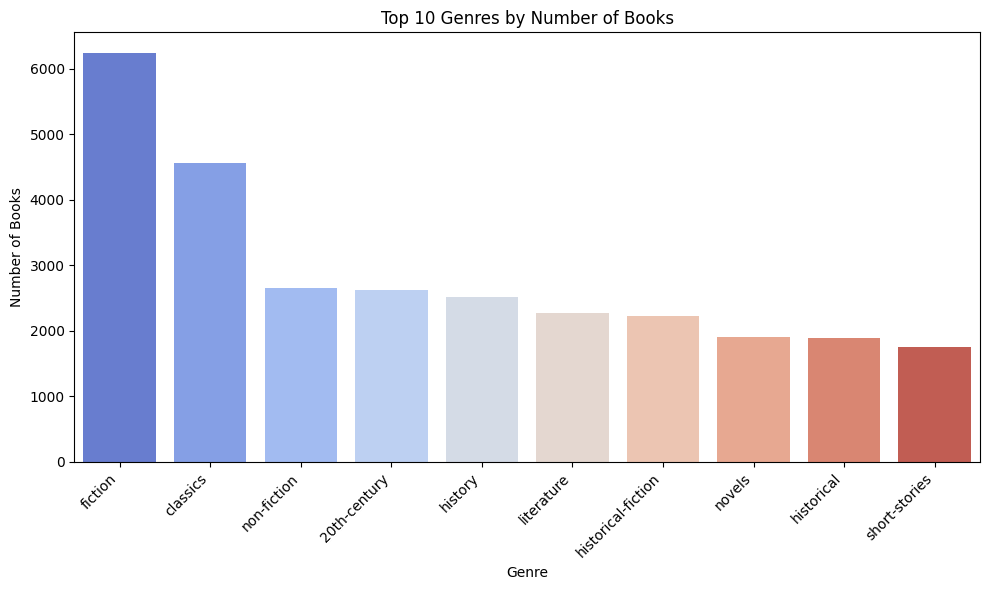

/var/folders/xk/dkwzfs8166d33myhj68mxhzh0000gn/T/ipykernel_24559/284387963.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='genres', y='avg_word_count', palette="coolwarm")


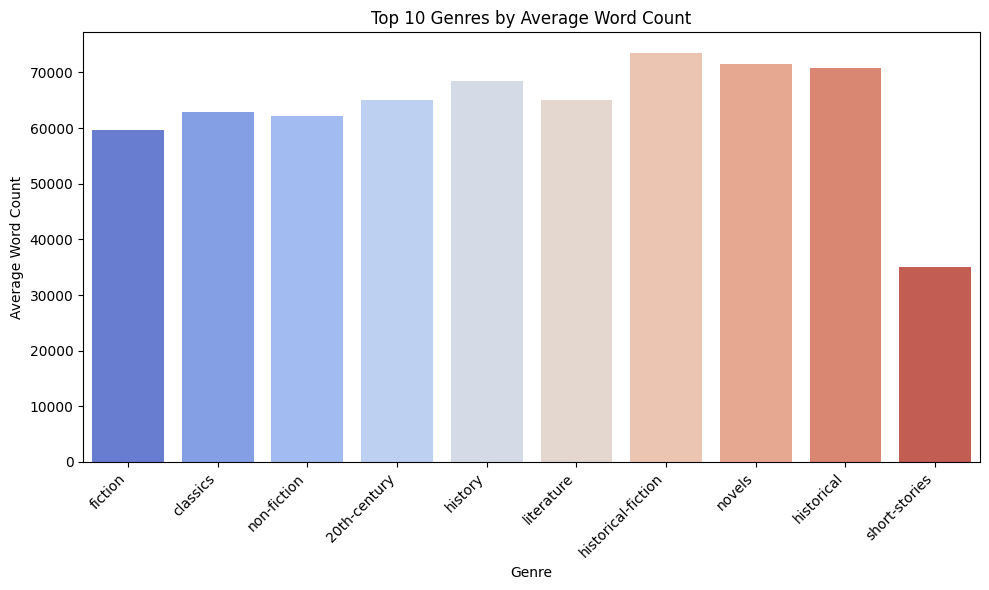

/var/folders/xk/dkwzfs8166d33myhj68mxhzh0000gn/T/ipykernel_24559/284387963.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='genres', y='avg_unique_word_count', palette="coolwarm")


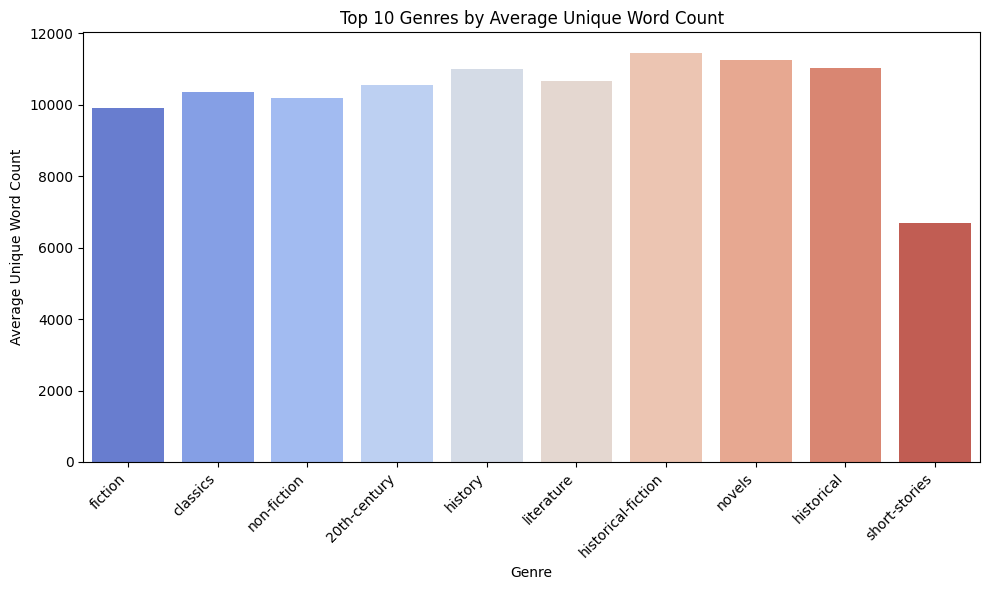

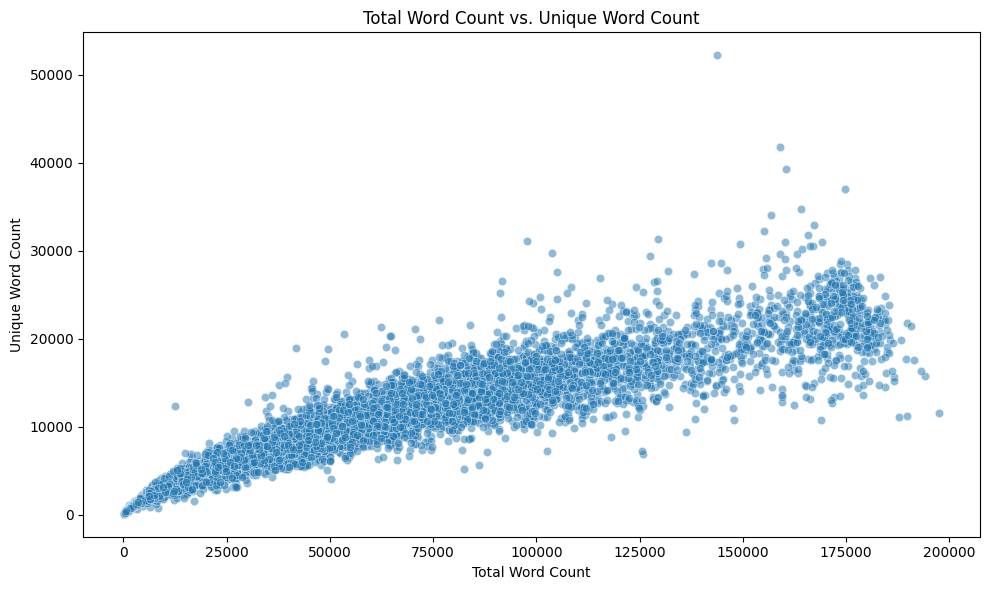

/var/folders/xk/dkwzfs8166d33myhj68mxhzh0000gn/T/ipykernel_24559/284387963.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='genres', y='text_length', palette="Set3")


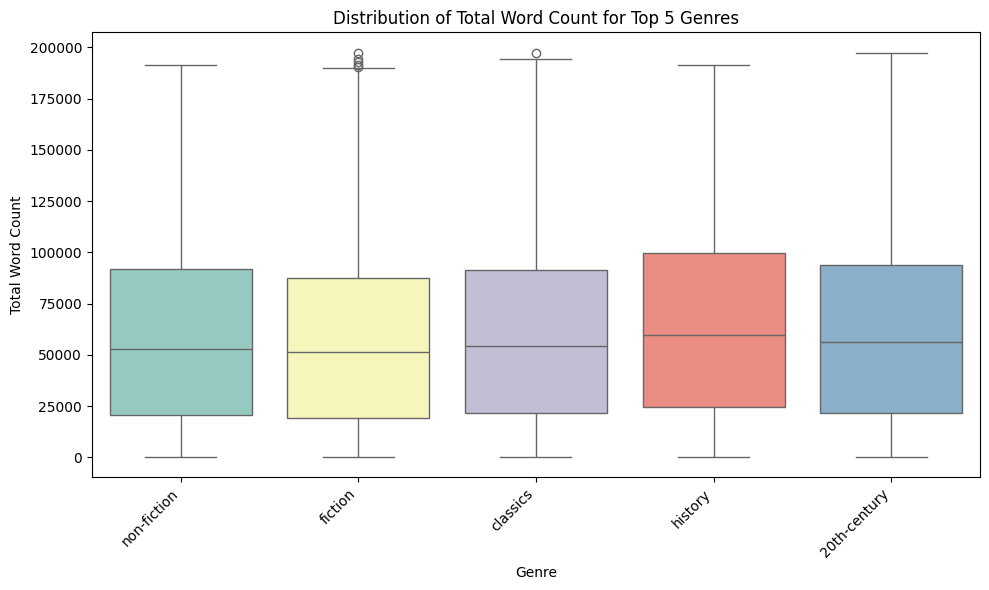

In [24]:
# --- Graph 1: Bar Chart for Top 10 Genres by Number of Books ---
plt.figure(figsize=(10,6))
sns.barplot(data=top10_genres, x='genres', y='num_books', palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Genres by Number of Books")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

# --- Graph 2: Bar Chart for Average Word Count per Genre ---
plt.figure(figsize=(10,6))
sns.barplot(data=top10_genres, x='genres', y='avg_word_count', palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Genres by Average Word Count")
plt.xlabel("Genre")
plt.ylabel("Average Word Count")
plt.tight_layout()
plt.show()

# --- Graph 3: Bar Chart for Average Unique Word Count per Genre ---
plt.figure(figsize=(10,6))
sns.barplot(data=top10_genres, x='genres', y='avg_unique_word_count', palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Genres by Average Unique Word Count")
plt.xlabel("Genre")
plt.ylabel("Average Unique Word Count")
plt.tight_layout()
plt.show()

# --- Graph 4: Scatter Plot of Total vs. Unique Word Count for All Unique Books ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_unique, x='text_length', y='unique_word_count', alpha=0.5)
plt.title("Total Word Count vs. Unique Word Count")
plt.xlabel("Total Word Count")
plt.ylabel("Unique Word Count")
plt.tight_layout()
plt.show()

# --- Graph 5: Box Plots for Distribution of Word Counts per Genre ---
top5_genres = top10_genres['genres'].tolist()[:5]
df_top5 = df_exploded[df_exploded['genres'].isin(top5_genres)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top5, x='genres', y='text_length', palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Total Word Count for Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("Total Word Count")
plt.tight_layout()
plt.show()


In [26]:
top5_genres

['fiction', 'classics', 'non-fiction', '20th-century', 'history']

In [ ]:
# from wordcloud import WordCloud

# for genre in top5_genres:
#     genre_data = df_exploded[df_exploded['genres'] == genre]
#     genre_texts = " ".join(genre_data['text'])
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_texts)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(f"Word Cloud for {genre}")
#     plt.show()
